<a href="https://colab.research.google.com/github/abhi57075/Crop-Detection-ML-models/blob/main/Crop_System_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET LOADING

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
crop = pd.read_csv("/content/Crop_recommendation.csv")

In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop.shape

(2200, 8)

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
crop.duplicated().sum()

0

In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
corr = crop.corr()
corr

<ipython-input-11-1dcd70030872>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = crop.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

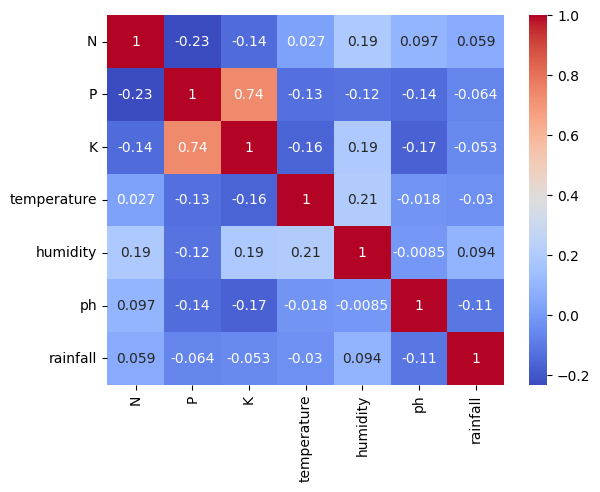

In [ ]:
import seaborn as sns
sns.heatmap(corr,annot=True, cbar=True,cmap='coolwarm')

In [ ]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
crop['label'].nunique() # This means 22 labels are there

22

In [ ]:
print(crop.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:
X = crop.drop('label',axis=1)
y = crop['label']

In [ ]:
X.shape

(2200, 7)

In [ ]:
y.shape

(2200,)

In [ ]:
y.nunique()

22

# TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1760, 7)

In [ ]:
X_test.shape

(440, 7)

In [ ]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


# RANDOM FOREST

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

n_estimators = 100
max_depth = 5

model_RFC = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)

training_accuracy = []
validation_accuracy = []

for epoch in range(1,n_estimators+1):
    model_RFC.fit(X_train, y_train)

    # Make predictions on the training set
    train_predictions = model_RFC.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model_RFC.predict(X_test)

    # Calculate accuracy on training and validation sets
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_test, val_predictions)

    # Store accuracy scores
    training_accuracy.append(train_accuracy)
    validation_accuracy.append(val_accuracy)

    if epoch%10 == 0:
      print(f'Epoch {epoch}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}')


Epoch 10: Training Accuracy = 0.9790, Validation Accuracy = 0.9614
Epoch 20: Training Accuracy = 0.9710, Validation Accuracy = 0.9636
Epoch 30: Training Accuracy = 0.9665, Validation Accuracy = 0.9727
Epoch 40: Training Accuracy = 0.9852, Validation Accuracy = 0.9773
Epoch 50: Training Accuracy = 0.9824, Validation Accuracy = 0.9705
Epoch 60: Training Accuracy = 0.9892, Validation Accuracy = 0.9818
Epoch 70: Training Accuracy = 0.9710, Validation Accuracy = 0.9750
Epoch 80: Training Accuracy = 0.9608, Validation Accuracy = 0.9500
Epoch 90: Training Accuracy = 0.9886, Validation Accuracy = 0.9818
Epoch 100: Training Accuracy = 0.9909, Validation Accuracy = 0.9795


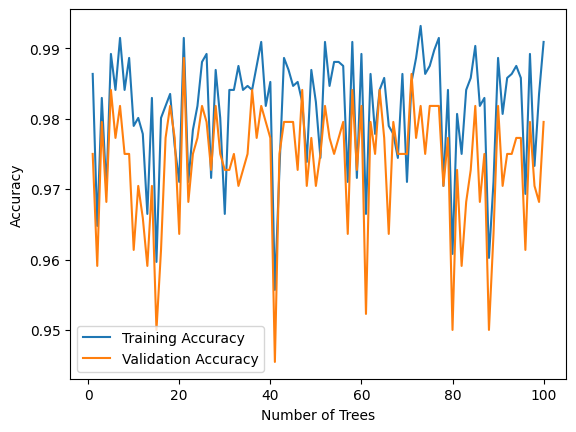

In [ ]:
# Plot the accuracy after every 10 epochs
plt.plot(range(1, n_estimators + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, n_estimators + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RFC1 = RandomForestClassifier(n_estimators = 500, max_depth= 5)
model_RFC1.fit(X_train,y_train)
y_pred = model_RFC1.predict(X_test)
print(accuracy_score(y_pred,y_test))


0.9772727272727273


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

model_RFC = RandomForestClassifier(n_estimators = 500, max_depth = 5)
history1 = model_RFC.fit(X_train, y_train)
y_pred = model_RFC.predict(X_test)
print(f'Accuracy for Random Forest classifier model is : {accuracy_score(y_pred, y_test)}')
print(classification_report(y_pred,y_test))

Accuracy for Random Forest classifier model is : 0.9840909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.87      0.93        23
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.96      0.92      0.94        24
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.92      0.96        12
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.83      1.00      0.91        20
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange 

# LOGISTIC REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

model_LRC = LogisticRegression(max_iter=1000)

training_accuracy = []
validation_accuracy = []

model_LRC.fit(X_train, y_train)

train_predictions = model_LRC.predict(X_train)

# Make predictions on the validation set
val_predictions = model_LRC.predict(X_test)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, train_predictions)
val_accuracy = accuracy_score(y_test, val_predictions)

# Store accuracy scores
training_accuracy.append(train_accuracy)
validation_accuracy.append(val_accuracy)

print(f'Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}')


Training Accuracy = 0.9801, Validation Accuracy = 0.9545


In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

model_LRC = LogisticRegression()
history1 = model_LRC.fit(X_train, y_train)
y_pred = model_LRC.predict(X_test)
print(f'Accuracy for Logistic Regression classifier model is : {accuracy_score(y_pred, y_test)}')
print(classification_report(y_pred,y_test))

Accuracy for Logistic Regression classifier model is : 0.9454545454545454
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      0.95      0.98        22
   blackgram       0.75      0.83      0.79        18
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        18
      cotton       0.94      0.80      0.86        20
      grapes       1.00      1.00      1.00        14
        jute       0.87      0.91      0.89        22
 kidneybeans       0.95      1.00      0.97        19
      lentil       0.91      0.83      0.87        12
       maize       0.76      0.94      0.84        17
       mango       1.00      0.95      0.97        20
   mothbeans       0.92      0.85      0.88        26
    mungbean       1.00      0.95      0.97        20
   muskmelon       1.00      1.00      1.00        17
      o

# STOCHASTIC GRADIENT DESCENT

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import numpy as np

model_SGD = SGDClassifier(max_iter=100000)

training_accuracy = []
validation_accuracy = []

# Train the model incrementally and record accuracy after every step
for step in range(1, 101):
    model_SGD.fit(X_train, y_train)

    # Make predictions on the training set
    train_predictions = model_SGD.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model_SGD.predict(X_test)

    # Calculate accuracy on training and validation sets
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_test, val_predictions)

    # Store accuracy scores
    training_accuracy.append(train_accuracy)
    validation_accuracy.append(val_accuracy)

    if step % 10 == 0:
        print(f'Epoch {step}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}')


Epoch 10: Training Accuracy = 0.7977, Validation Accuracy = 0.7295
Epoch 20: Training Accuracy = 0.7682, Validation Accuracy = 0.7386
Epoch 30: Training Accuracy = 0.6648, Validation Accuracy = 0.6250
Epoch 40: Training Accuracy = 0.8017, Validation Accuracy = 0.7705
Epoch 50: Training Accuracy = 0.7545, Validation Accuracy = 0.7068
Epoch 60: Training Accuracy = 0.6733, Validation Accuracy = 0.6455
Epoch 70: Training Accuracy = 0.6972, Validation Accuracy = 0.6386
Epoch 80: Training Accuracy = 0.7381, Validation Accuracy = 0.6682
Epoch 90: Training Accuracy = 0.7994, Validation Accuracy = 0.7477
Epoch 100: Training Accuracy = 0.7722, Validation Accuracy = 0.7136


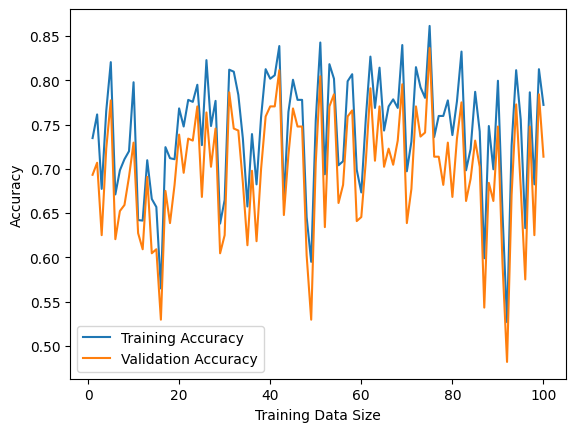

In [ ]:
plt.plot(range(1, 101), training_accuracy, label='Training Accuracy')
plt.plot(range(1, 101), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# GAUSSIAN NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning

# Create a Gaussian Naive Bayes classifier
model_GNB = GaussianNB()  # Increase max_iter to avoid ConvergenceWarning

# Disable ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

training_accuracy = []
validation_accuracy = []

for step in range(1, 101, 1):
    # Train the model with a subset of data
    model_GNB.fit(X_train[:step+100], y_train[:step+100])

    # Make predictions on the training set
    train_predictions = model_GNB.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model_GNB.predict(X_test)

    # Calculate accuracy on training and validation sets
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_test, val_predictions)

    # Store accuracy scores
    training_accuracy.append(train_accuracy)
    validation_accuracy.append(val_accuracy)

    if step%10 == 0:
      print(f'Step {step}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}')




Step 10: Training Accuracy = 0.8040, Validation Accuracy = 0.7705
Step 20: Training Accuracy = 0.8108, Validation Accuracy = 0.7682
Step 30: Training Accuracy = 0.8972, Validation Accuracy = 0.8591
Step 40: Training Accuracy = 0.9045, Validation Accuracy = 0.8727
Step 50: Training Accuracy = 0.9062, Validation Accuracy = 0.8750
Step 60: Training Accuracy = 0.9227, Validation Accuracy = 0.9000
Step 70: Training Accuracy = 0.9420, Validation Accuracy = 0.9227
Step 80: Training Accuracy = 0.9403, Validation Accuracy = 0.9273
Step 90: Training Accuracy = 0.9682, Validation Accuracy = 0.9705
Step 100: Training Accuracy = 0.9733, Validation Accuracy = 0.9682


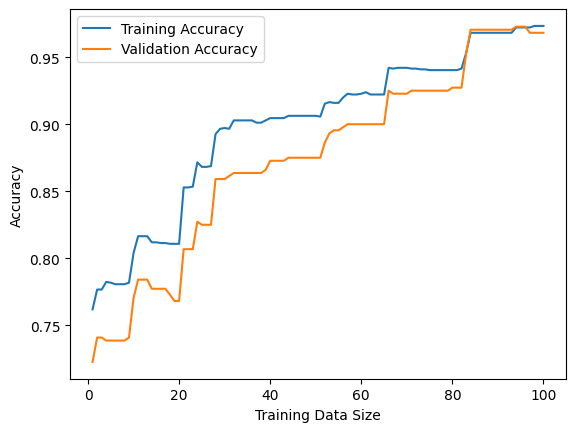

In [ ]:
plt.plot(range(1, 101, 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, 101, 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_GNB1 = GaussianNB()
model_GNB1.fit(X_train,y_train)
y_pred = model_GNB1.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.9954545454545455


In [ ]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

model_GNB = GaussianNB()
history1 = model_GNB.fit(X_train, y_train)
y_pred = model_GNB.predict(X_test)
print(f'Accuracy for Gaussian Naive Bayes classifier model is : {accuracy_score(y_pred, y_test)}')
print(classification_report(y_pred,y_test))

Accuracy for Gaussian Naive Bayes classifier model is : 0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       1.00      0.92      0.96        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      

# SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning

# Create a Support Vector Machine classifier
model_SVC = SVC()  # Increase max_iter to avoid ConvergenceWarning

# Disable ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Lists to store accuracy scores
training_accuracy = []
validation_accuracy = []

for step in range(1, 101, 1):
    # Train the model with a subset of data
    model_SVC.fit(X_train[:step+100], y_train[:step+100])

    # Make predictions on the training set
    train_predictions = model_SVC.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model_SVC.predict(X_test)

    # Calculate accuracy on training and validation sets
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_test, val_predictions)

    # Store accuracy scores
    training_accuracy.append(train_accuracy)
    validation_accuracy.append(val_accuracy)

    if step%10 == 0:
      print(f'Step {step}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}')

Step 10: Training Accuracy = 0.5381, Validation Accuracy = 0.5068
Step 20: Training Accuracy = 0.5148, Validation Accuracy = 0.5159
Step 30: Training Accuracy = 0.5733, Validation Accuracy = 0.5705
Step 40: Training Accuracy = 0.5790, Validation Accuracy = 0.5818
Step 50: Training Accuracy = 0.6392, Validation Accuracy = 0.6114
Step 60: Training Accuracy = 0.6926, Validation Accuracy = 0.6545
Step 70: Training Accuracy = 0.6835, Validation Accuracy = 0.6500
Step 80: Training Accuracy = 0.7011, Validation Accuracy = 0.6614
Step 90: Training Accuracy = 0.7727, Validation Accuracy = 0.7477
Step 100: Training Accuracy = 0.8347, Validation Accuracy = 0.8091


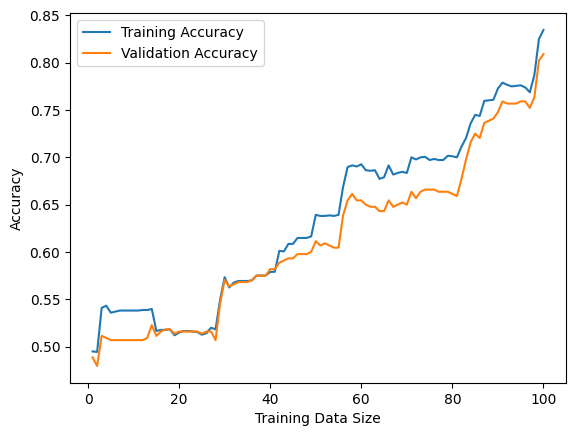

In [ ]:
plt.plot(range(1, 101, 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, 101, 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.svm import SVC
model_SVC1 = SVC()
model_SVC1.fit(X_train,y_train)
y_pred = model_SVC1.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.9613636363636363


In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

model_SVC = SVC()
history1 = model_SVC.fit(X_train, y_train)
y_pred = model_SVC.predict(X_test)
print(f'Accuracy for Support Vector classifier model is : {accuracy_score(y_pred, y_test)}')
print(classification_report(y_pred,y_test))

Accuracy for Support Vector classifier model is : 0.9613636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.91      0.95        22
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        16
      cotton       1.00      0.85      0.92        20
      grapes       1.00      1.00      1.00        14
        jute       1.00      0.77      0.87        30
 kidneybeans       1.00      0.95      0.98        21
      lentil       1.00      0.79      0.88        14
       maize       0.86      1.00      0.92        18
       mango       1.00      1.00      1.00        19
   mothbeans       0.88      1.00      0.93        21
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange

# DECISION TREE MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning

# Create a Decision tree classifier
model_DTC = DecisionTreeClassifier(max_leaf_nodes = 25, min_samples_split = 4, random_state = 42)  # Increase max_iter to avoid ConvergenceWarning

# Disable ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

training_accuracy = []
validation_accuracy = []

for step in range(1, 101, 1):
    model_DTC.fit(X_train[:step], y_train[:step])

    # Make predictions on the training set
    train_predictions = model_DTC.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model_DTC.predict(X_test)

    # Calculate accuracy on training and validation sets
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_test, val_predictions)

    # Store accuracy scores
    training_accuracy.append(train_accuracy)
    validation_accuracy.append(val_accuracy)

    if step%10 == 0:
      print(f'Epoch {step}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}')



Epoch 10: Training Accuracy = 0.1284, Validation Accuracy = 0.1068
Epoch 20: Training Accuracy = 0.2773, Validation Accuracy = 0.2864
Epoch 30: Training Accuracy = 0.3932, Validation Accuracy = 0.3659
Epoch 40: Training Accuracy = 0.5193, Validation Accuracy = 0.4864
Epoch 50: Training Accuracy = 0.5324, Validation Accuracy = 0.5273
Epoch 60: Training Accuracy = 0.6051, Validation Accuracy = 0.5727
Epoch 70: Training Accuracy = 0.6472, Validation Accuracy = 0.6227
Epoch 80: Training Accuracy = 0.7489, Validation Accuracy = 0.7000
Epoch 90: Training Accuracy = 0.7415, Validation Accuracy = 0.7091
Epoch 100: Training Accuracy = 0.7551, Validation Accuracy = 0.7205


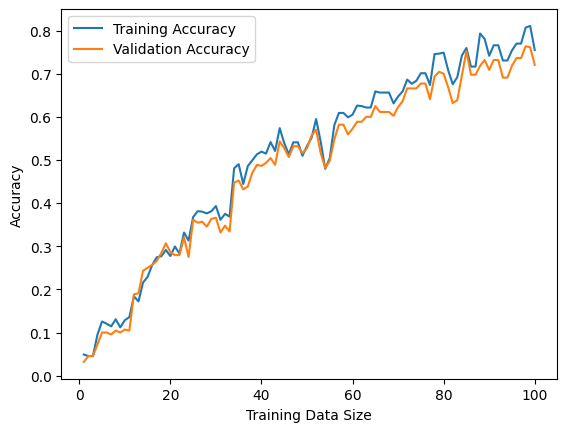

In [ ]:
plt.plot(range(1, 101, 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, 101, 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DTC1 = DecisionTreeClassifier(max_leaf_nodes=25, min_samples_split=4, random_state=42)
model_DTC1.fit(X_train,y_train)
y_pred = model_DTC1.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.9659090909090909


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

model_DTC = DecisionTreeClassifier(max_leaf_nodes = 25, min_samples_split = 4, random_state = 42)
history1 = model_DTC.fit(X_train, y_train)
y_pred = model_DTC.predict(X_test)
print(f'Accuracy for decision tree model is : {accuracy_score(y_pred, y_test)}')
print(classification_report(y_pred,y_test))

Accuracy for decision tree model is : 0.9659090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.90      1.00      0.95        18
    chickpea       1.00      1.00      1.00        26
     coconut       0.96      1.00      0.98        26
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.96      0.85      0.90        26
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.73      0.85        15
       maize       0.86      1.00      0.92        18
       mango       1.00      1.00      1.00        19
   mothbeans       0.83      0.91      0.87        22
    mungbean       1.00      0.86      0.93        22
   muskmelon       1.00      1.00      1.00        17
      orange       1.00 

# ADA BOOST MODEL

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning

# Create a AdaBoost classifier
model_ABC = AdaBoostClassifier()  # Increase max_iter to avoid ConvergenceWarning

# Disable ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

training_accuracy = []
validation_accuracy = []

for step in range(1, 101, 1):
    model_ABC.fit(X_train[:step+100], y_train[:step+100])

    # Make predictions on the training set
    train_predictions = model_ABC.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model_ABC.predict(X_test)

    # Calculate accuracy on training and validation sets
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_test, val_predictions)

    # Store accuracy scores
    training_accuracy.append(train_accuracy)
    validation_accuracy.append(val_accuracy)

    if step%10 == 0:
      print(f'Step {step}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}')




Step 10: Training Accuracy = 0.3216, Validation Accuracy = 0.3227
Step 20: Training Accuracy = 0.4114, Validation Accuracy = 0.4000
Step 30: Training Accuracy = 0.2568, Validation Accuracy = 0.2523
Step 40: Training Accuracy = 0.1926, Validation Accuracy = 0.1750
Step 50: Training Accuracy = 0.2426, Validation Accuracy = 0.2477
Step 60: Training Accuracy = 0.1568, Validation Accuracy = 0.1636
Step 70: Training Accuracy = 0.2472, Validation Accuracy = 0.2432
Step 80: Training Accuracy = 0.2460, Validation Accuracy = 0.2432
Step 90: Training Accuracy = 0.1801, Validation Accuracy = 0.1886
Step 100: Training Accuracy = 0.2659, Validation Accuracy = 0.3000


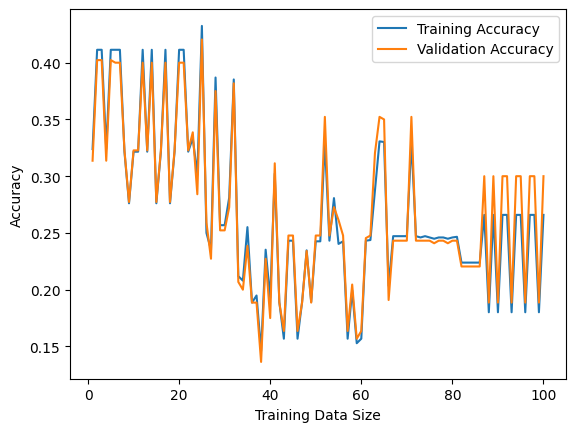

In [ ]:
# Plot the accuracy after every step
plt.plot(range(1, 101, 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, 101, 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_ABC1 = AdaBoostClassifier()
model_ABC1.fit(X_train,y_train)
y_pred = model_ABC1.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.1409090909090909


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

model_ABC = AdaBoostClassifier()
history1 = model_ABC.fit(X_train, y_train)
y_pred = model_ABC.predict(X_test)
print(f'Accuracy for ADA boost model is : {accuracy_score(y_pred, y_test)}')
print(classification_report(y_pred,y_test))

Accuracy for ADA boost model is : 0.1409090909090909
              precision    recall  f1-score   support

       apple       0.00      0.00      0.00         0
      banana       0.00      0.00      0.00         0
   blackgram       0.00      0.00      0.00         0
    chickpea       0.00      0.00      0.00         0
     coconut       0.00      0.00      0.00         0
      coffee       0.00      0.00      0.00         0
      cotton       0.00      0.00      0.00         0
      grapes       1.00      0.38      0.55        37
        jute       0.00      0.00      0.00         0
 kidneybeans       1.00      0.43      0.61        46
      lentil       1.00      0.03      0.06       340
       maize       0.00      0.00      0.00         0
       mango       0.00      0.00      0.00         0
   mothbeans       0.00      0.00      0.00         0
    mungbean       0.00      0.00      0.00         0
   muskmelon       1.00      1.00      1.00        17
      orange       0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning

# Create a KNN model classifier
model_KNN = KNeighborsClassifier(n_neighbors = 10)  # Increase max_iter to avoid ConvergenceWarning

# Disable ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Lists to store accuracy scores
training_accuracy = []
validation_accuracy = []

# Train the model incrementally and record accuracy after every step
for step in range(1, 101, 1):
    # Train the model with a subset of data
    model_KNN.fit(X_train[:step+100], y_train[:step+100])

    # Make predictions on the training set
    train_predictions = model_KNN.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model_KNN.predict(X_test)

    # Calculate accuracy on training and validation sets
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_test, val_predictions)

    # Store accuracy scores
    training_accuracy.append(train_accuracy)
    validation_accuracy.append(val_accuracy)

    if step%10==0:
      print(f'Step {step}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}')


Step 10: Training Accuracy = 0.6182, Validation Accuracy = 0.6023
Step 20: Training Accuracy = 0.6449, Validation Accuracy = 0.6364
Step 30: Training Accuracy = 0.6858, Validation Accuracy = 0.6727
Step 40: Training Accuracy = 0.6892, Validation Accuracy = 0.6773
Step 50: Training Accuracy = 0.7415, Validation Accuracy = 0.7091
Step 60: Training Accuracy = 0.7824, Validation Accuracy = 0.7409
Step 70: Training Accuracy = 0.7869, Validation Accuracy = 0.7500
Step 80: Training Accuracy = 0.7960, Validation Accuracy = 0.7636
Step 90: Training Accuracy = 0.8318, Validation Accuracy = 0.8182
Step 100: Training Accuracy = 0.8580, Validation Accuracy = 0.8477


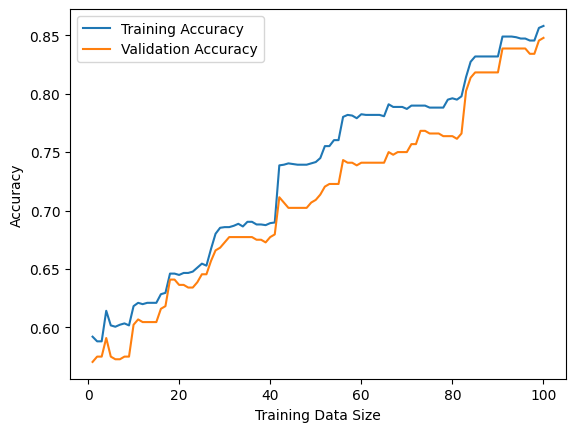

In [ ]:
plt.plot(range(1, 101, 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, 101, 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnClassifier1 = KNeighborsClassifier(n_neighbors=10)
knnClassifier1.fit(X_train,y_train)
y_pred = knnClassifier1.predict(X_test)
print(accuracy_score(y_pred,y_test))
target_names = ['No' 'Yes']

0.9590909090909091


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

model_KNN = KNeighborsClassifier(n_neighbors = 10)
history1 = model_KNN.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)
print(f'Accuracy for ADA boost model is : {accuracy_score(y_pred, y_test)}')
print(classification_report(y_pred,y_test))

Accuracy for ADA boost model is : 0.9590909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.91      0.95        22
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        16
      cotton       1.00      0.85      0.92        20
      grapes       1.00      1.00      1.00        14
        jute       1.00      0.72      0.84        32
 kidneybeans       1.00      0.95      0.98        21
      lentil       1.00      0.79      0.88        14
       maize       0.86      1.00      0.92        18
       mango       1.00      1.00      1.00        19
   mothbeans       0.88      1.00      0.93        21
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00     

In [ ]:
N = 26
P = 80
k = 83
temperature = 17.08499
humidity = 16.14566
ph = 7.5286
rainfal = 71.31007


predict_res = model_LRC.predict([[N,P,k,temperature,humidity,ph,rainfal]])
class_probabilities = model_LRC.predict_proba([[N,P,k,temperature,humidity,ph,rainfal]])
# print(class_probabilities)
l1 = model_LRC.classes_
# print(l1)
d = {class_name: prob for class_name, prob in zip(l1, class_probabilities[0])}

d = dict(sorted(d.items(), key=lambda item: item[1], reverse=True)) # Sorting the dictionary based on probability score
# print(d)

for i in d:
  print("{} has the probability score of {}".format(i, d[i]))
print("\n\n")
print("Given parameters predicts the crop is : {}".format(predict_res[0]))

chickpea has the probability score of 0.9998735562632446
apple has the probability score of 0.00012449854672840892
kidneybeans has the probability score of 1.945035751291832e-06
papaya has the probability score of 1.4861600609242653e-10
banana has the probability score of 3.0563228266049526e-12
grapes has the probability score of 2.60226146410371e-12
mango has the probability score of 1.070450188988274e-15
mothbeans has the probability score of 3.5116438077468074e-23
pigeonpeas has the probability score of 7.491625150397265e-30
blackgram has the probability score of 5.714191070740119e-30
pomegranate has the probability score of 4.939679866475236e-31
lentil has the probability score of 1.744543384959236e-31
jute has the probability score of 7.683868070251034e-32
maize has the probability score of 4.094607198946899e-38
rice has the probability score of 1.3708643846506756e-39
watermelon has the probability score of 7.41685255646533e-46
coffee has the probability score of 8.982188815522644

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# OUR PROPOSED ARCHITECTURE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert integers to one-hot encoded vectors
num_classes = len(np.unique(y_train_encoded))
y_train_onehot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes=num_classes)

model = Sequential()
model.add(Dense(units=1024, input_dim=7, activation='softmax'))
model.add(Dense(units=512, activation='softmax'))
model.add(Dense(units=256, activation='softmax'))
model.add(Dense(units=128, activation='softmax'))
model.add(Dense(units=64, activation='softmax'))
model.add(Dense(units=32, activation='softmax'))
model.add(Dense(units=22, activation='softmax'))  # Assuming 22 classes
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train_encoded, epochs=500, validation_data=(X_test, y_test_encoded), verbose=0)

print(history)

# Access training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot the training accuracy and validation accuracy over epochs
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# SUMMARY

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest neighbours': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier()
}

for name, md in models.items():
    md.fit(x_train,y_train)
    ypred = md.predict(x_test)

    print(f"{name} with accuracy : {accuracy_score(y_test,ypred)}")

# Here from the output obtained Naive Bayes is giving us the max accuracy of around 99.5 percent

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression with accuracy : 0.9454545454545454
Naive Bayes with accuracy : 0.9954545454545455
Support Vector Machine with accuracy : 0.9613636363636363
K-Nearest neighbours with accuracy : 0.9704545454545455
Decision Tree with accuracy : 0.9818181818181818
Random Forest with accuracy : 0.9931818181818182
Bagging with accuracy : 0.9931818181818182
AdaBoost with accuracy : 0.9818181818181818
Extra Trees with accuracy : 0.9159090909090909


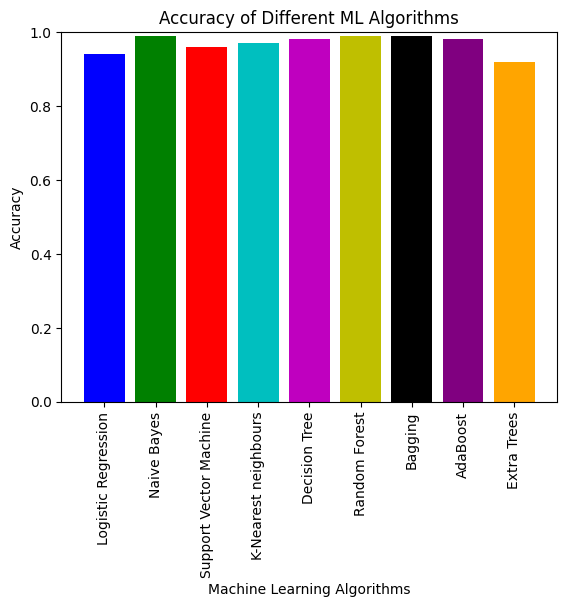

In [ ]:
import matplotlib.pyplot as plt

algorithms = ['Logistic Regression',
    'Naive Bayes',
    'Support Vector Machine',
    'K-Nearest neighbours',
    'Decision Tree',
    'Random Forest',
    'Bagging',
    'AdaBoost',
    'Extra Trees']
accuracy_scores = [0.94, 0.99, 0.96, 0.97, 0.98, 0.99, 0.99, 0.98, 0.92]

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange']

# Create the bar chart
plt.bar(algorithms, accuracy_scores, color=colors)
plt.xticks(rotation = 90)
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different ML Algorithms')
plt.ylim(0, 1)  # Set the y-axis range (0 to 1 for accuracy)

plt.show()